In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
# Import cleaned dataset
train = pd.read_csv('../data/train.csv')

[Text(0.5, 0, 'Sale Price (dollars)'), Text(0, 0.5, 'Count')]

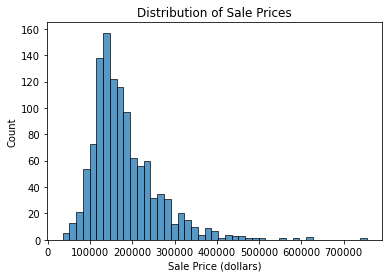

In [49]:
# Plot distribution of sales price
plot = sns.histplot(train, x="SalePrice")
plot.set_title('Distribution of Sale Prices')
plot.set(xlabel='Sale Price (dollars)', ylabel='Count')

In [50]:
#Function for dropping outliers in SalePrice
def drop_target_outliers(df):
    '''Drops outliers beyond 3 standard deviations of the mean'''
    df = df[df['SalePrice'] < (df['SalePrice'].mean() + 3*(df['SalePrice'].std()))]
    return df

[Text(0.5, 0, 'Sale Price (dollars)'), Text(0, 0.5, 'Count')]

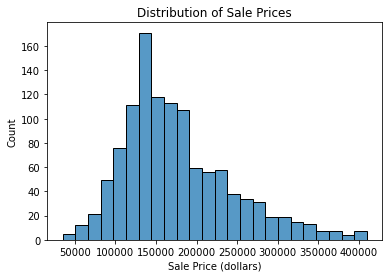

In [51]:
train = drop_target_outliers(train)
plot = sns.histplot(train, x="SalePrice")
plot.set_title('Distribution of Sale Prices')
plot.set(xlabel='Sale Price (dollars)', ylabel='Count')

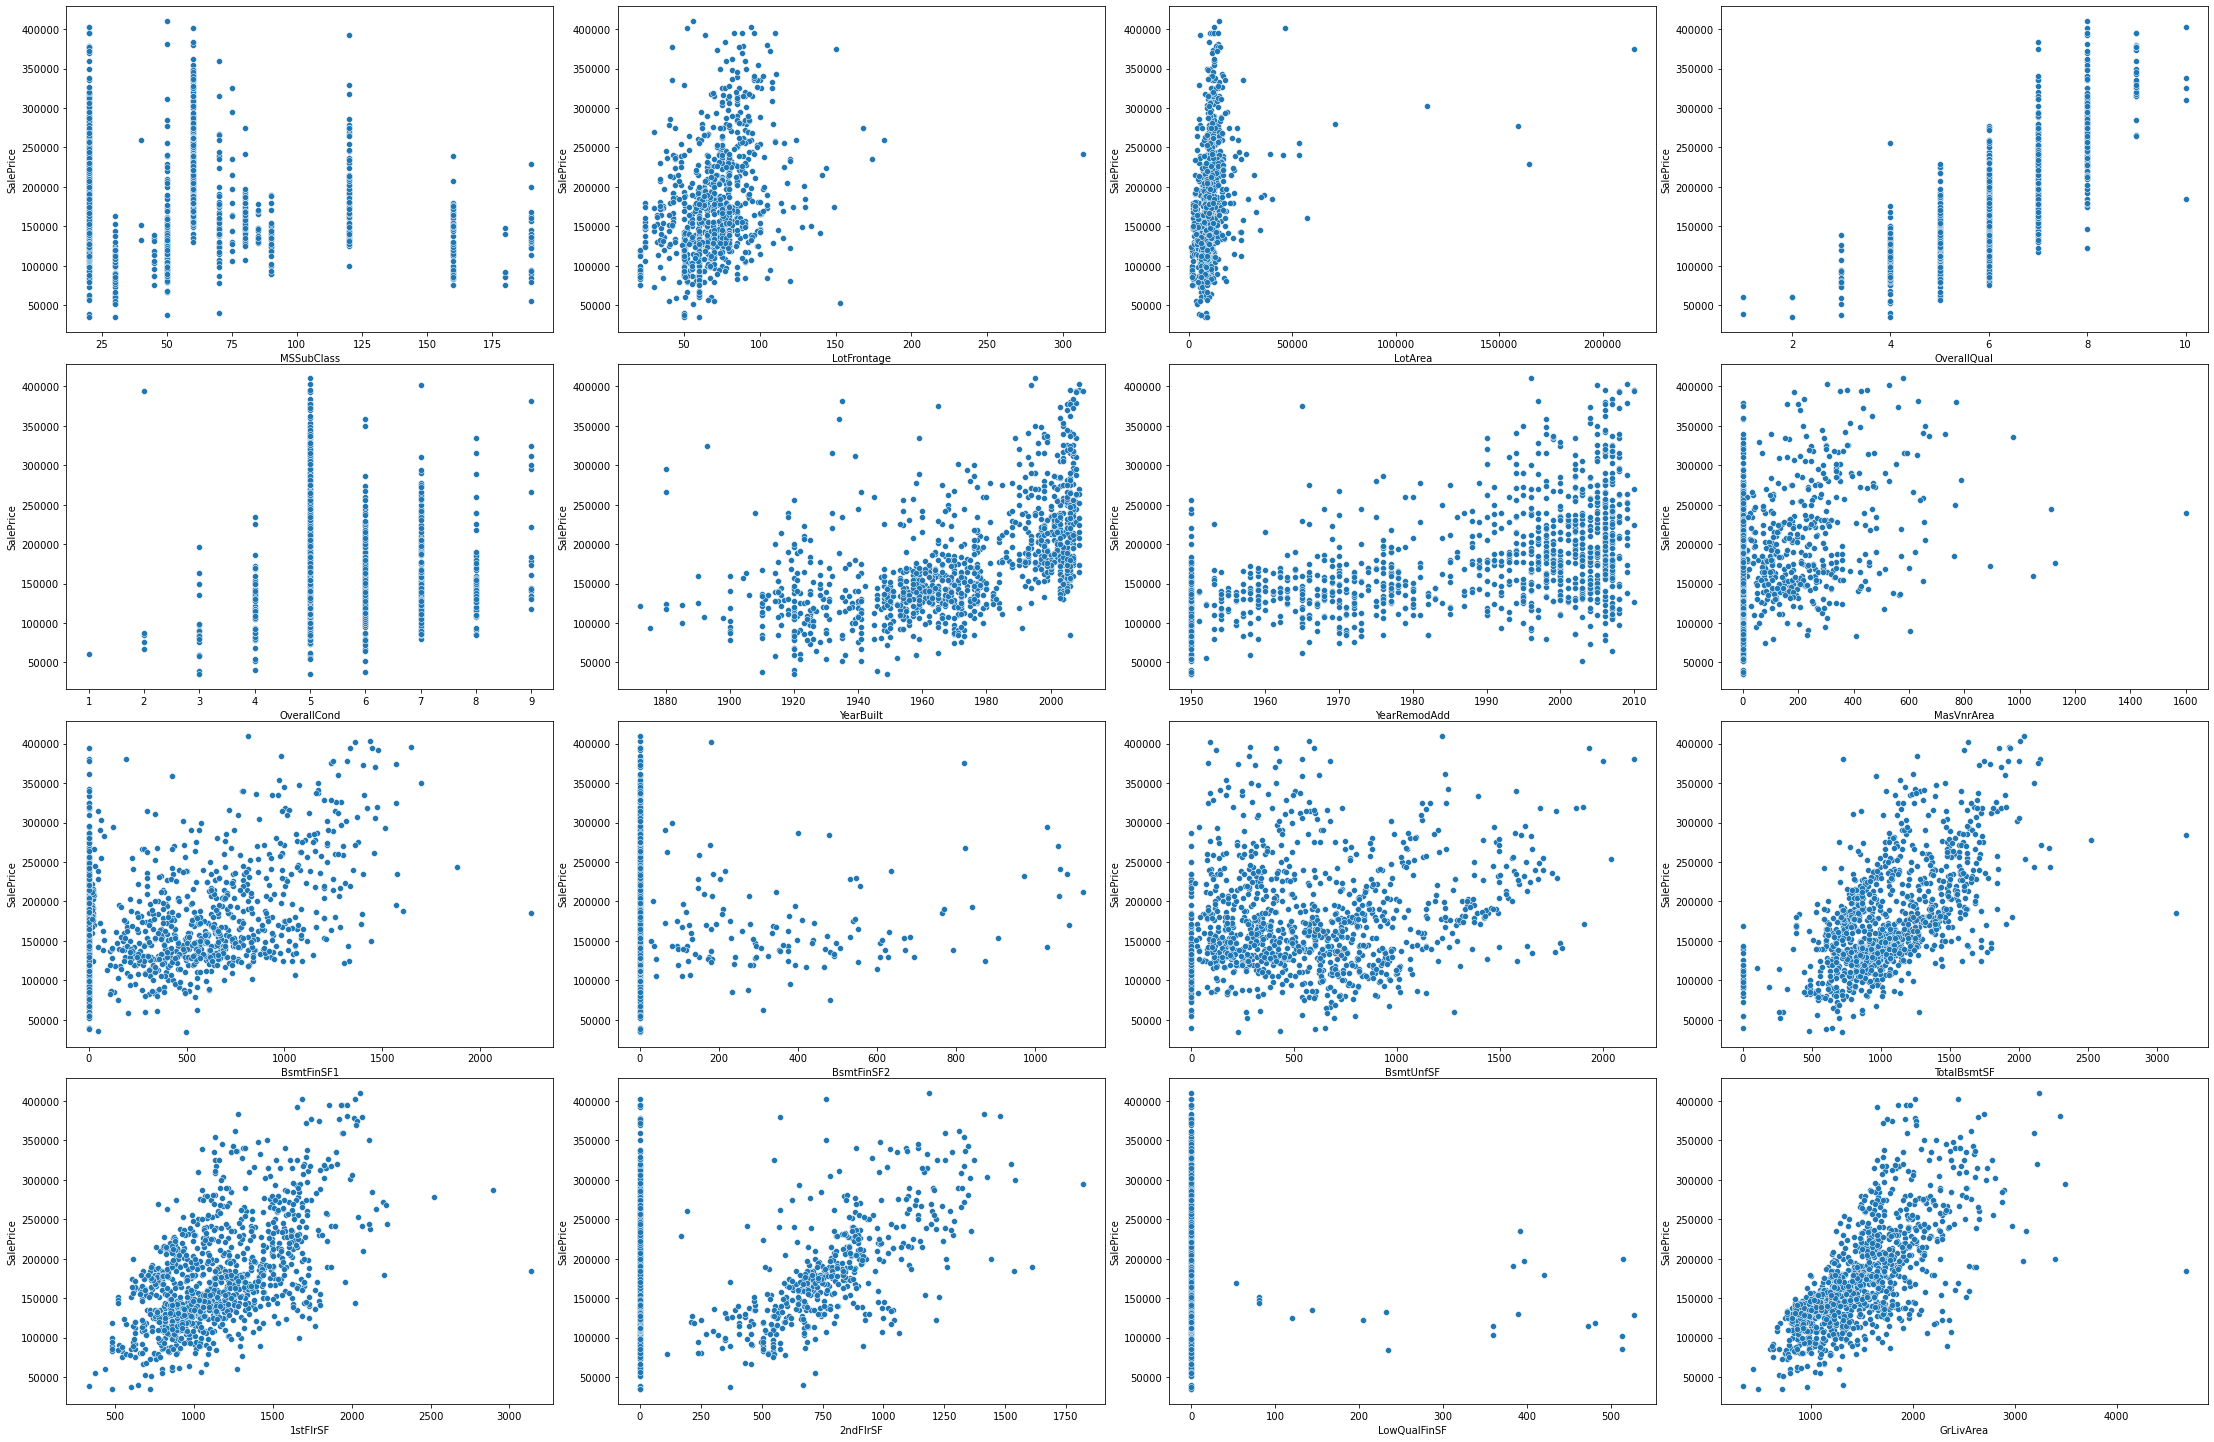

In [149]:
cate_features = [col for i, col in enumerate(train.dtypes.index) if  train.dtypes[i]== 'object']
num_features = [col for i, col in enumerate(train.dtypes.index) if  train.dtypes[i] != 'object']


plot_vars = num_features[:16]
def create_plot(vars_lst, subplots_rows, subplots_cols, box_plot = False):
    fig, ax = plt.subplots(subplots_rows,subplots_cols, figsize=(20,20))
    plt.tight_layout()
    plt.subplots_adjust(left=-0.5) 
    count = -1
    for i in range(subplots_rows):
        for j in range(subplots_cols):
            count += 1
            x=train[vars_lst[count]]
            if vars_lst[count] in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
                                  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
                                  'MiscFeature']:
                x=train[vars_lst[count]].fillna('NAs')
            if box_plot:
                sns.boxplot(ax = ax[i,j], x=x, y=train['SalePrice'])
            else:
                sns.scatterplot(ax = ax[i,j], x=x, y=train['SalePrice'])
                

            
create_plot(plot_vars, 4, 4)


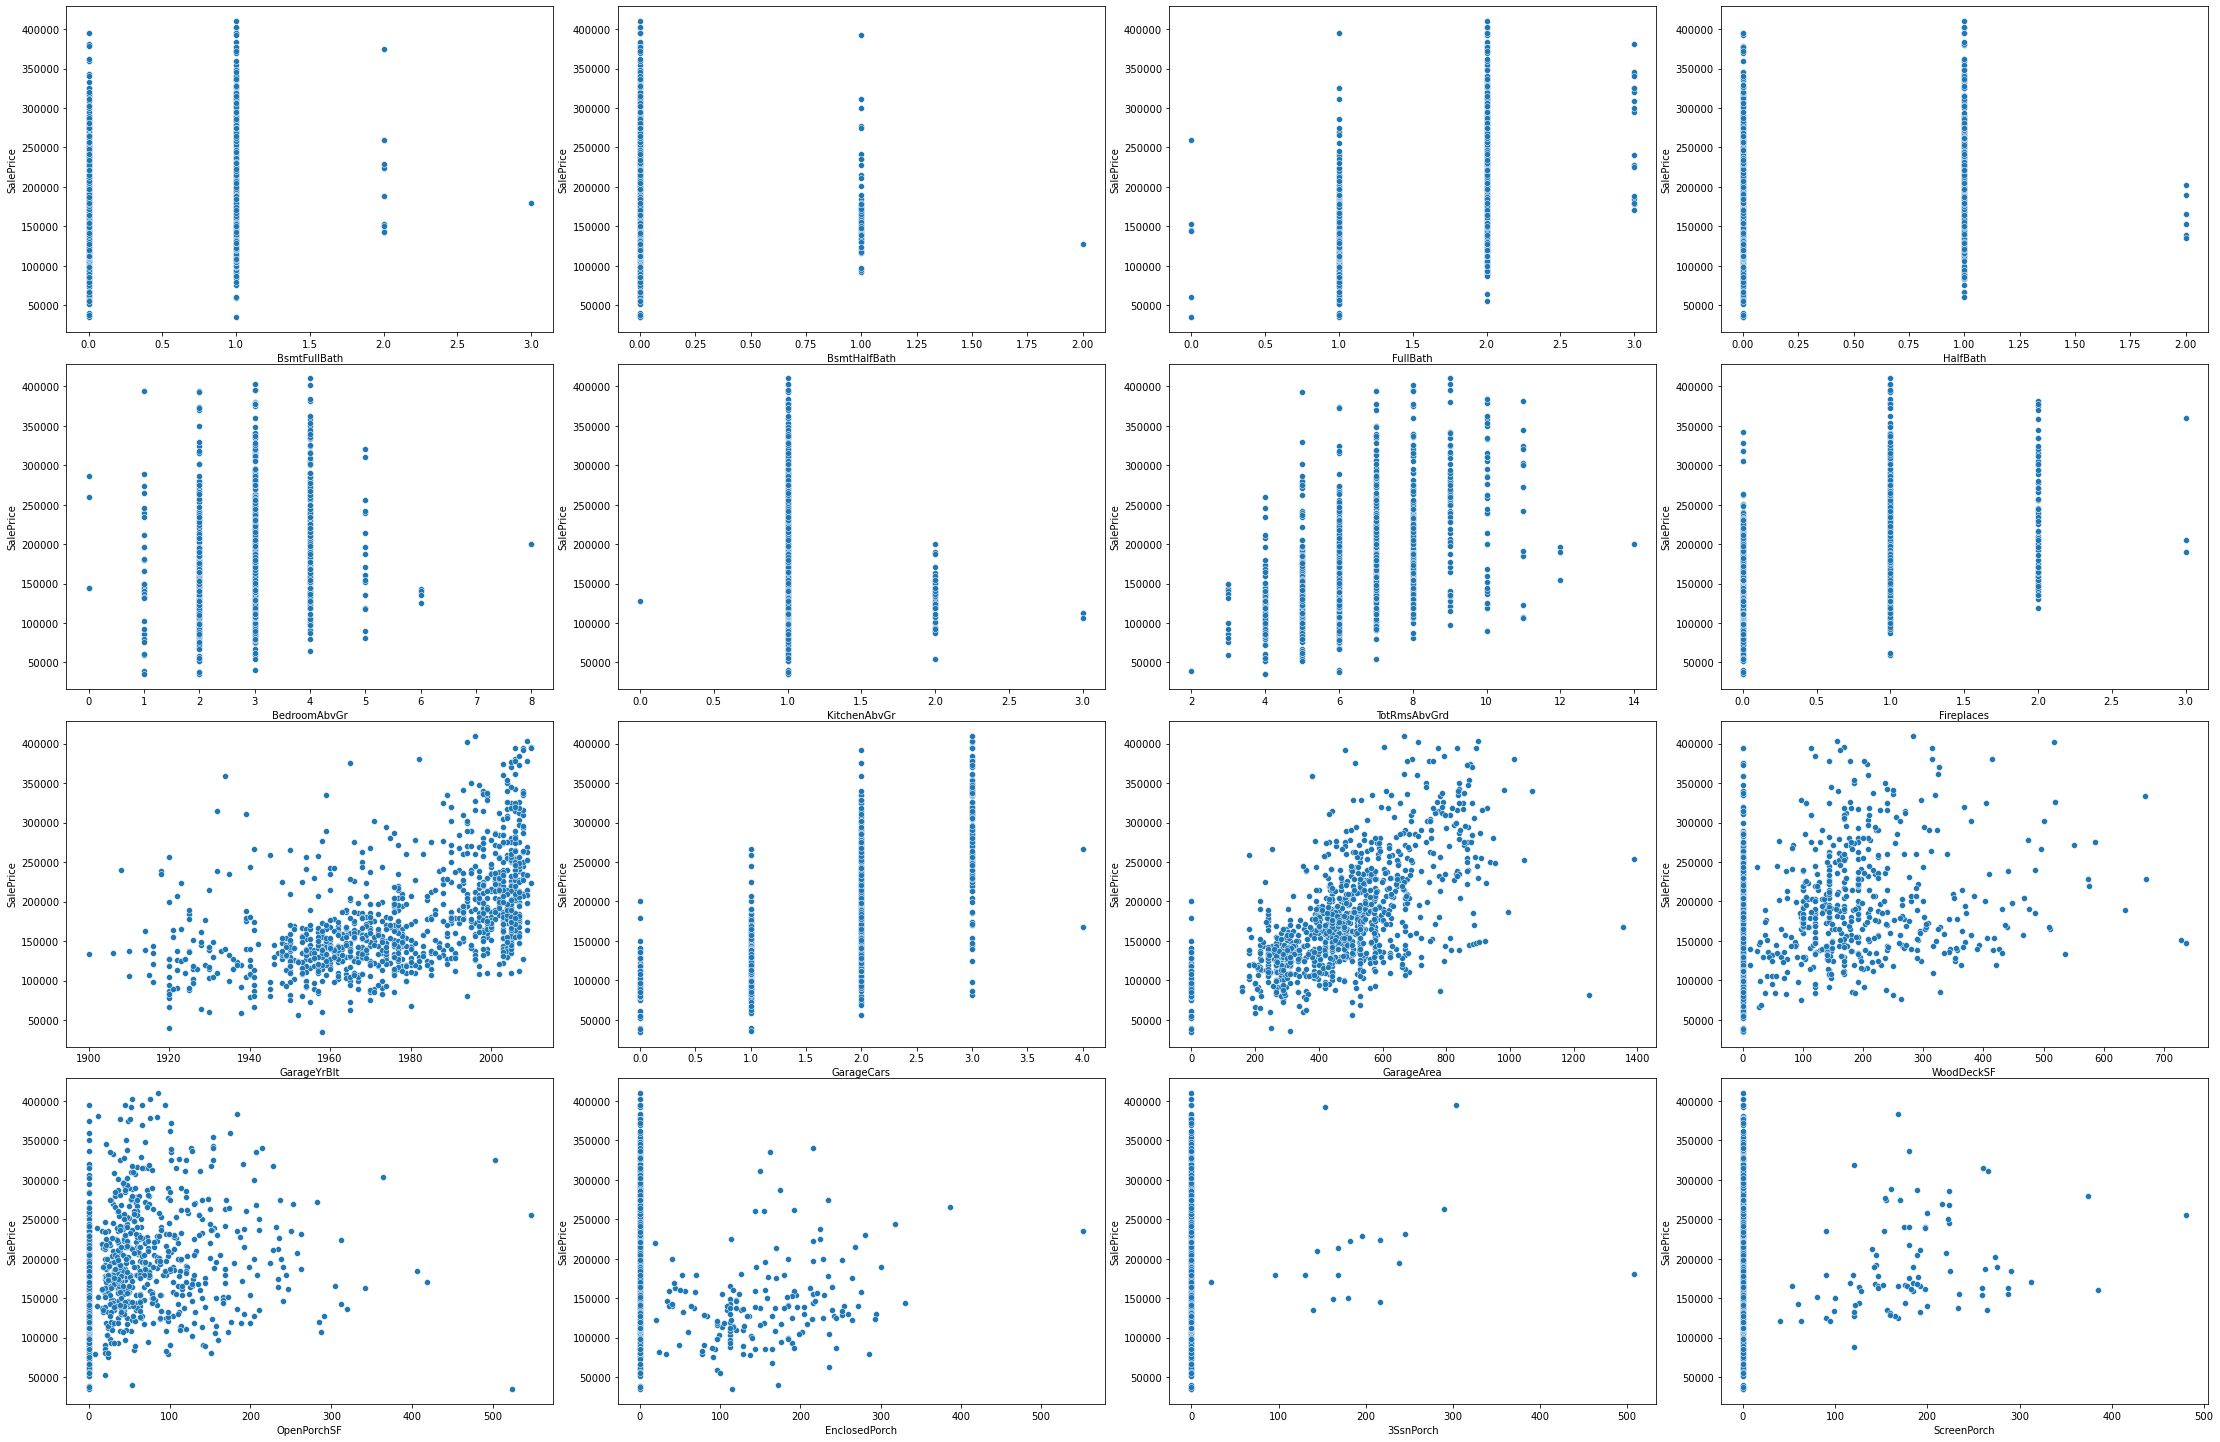

In [150]:
plot_vars = num_features[16:32]
create_plot(plot_vars, 4, 4)

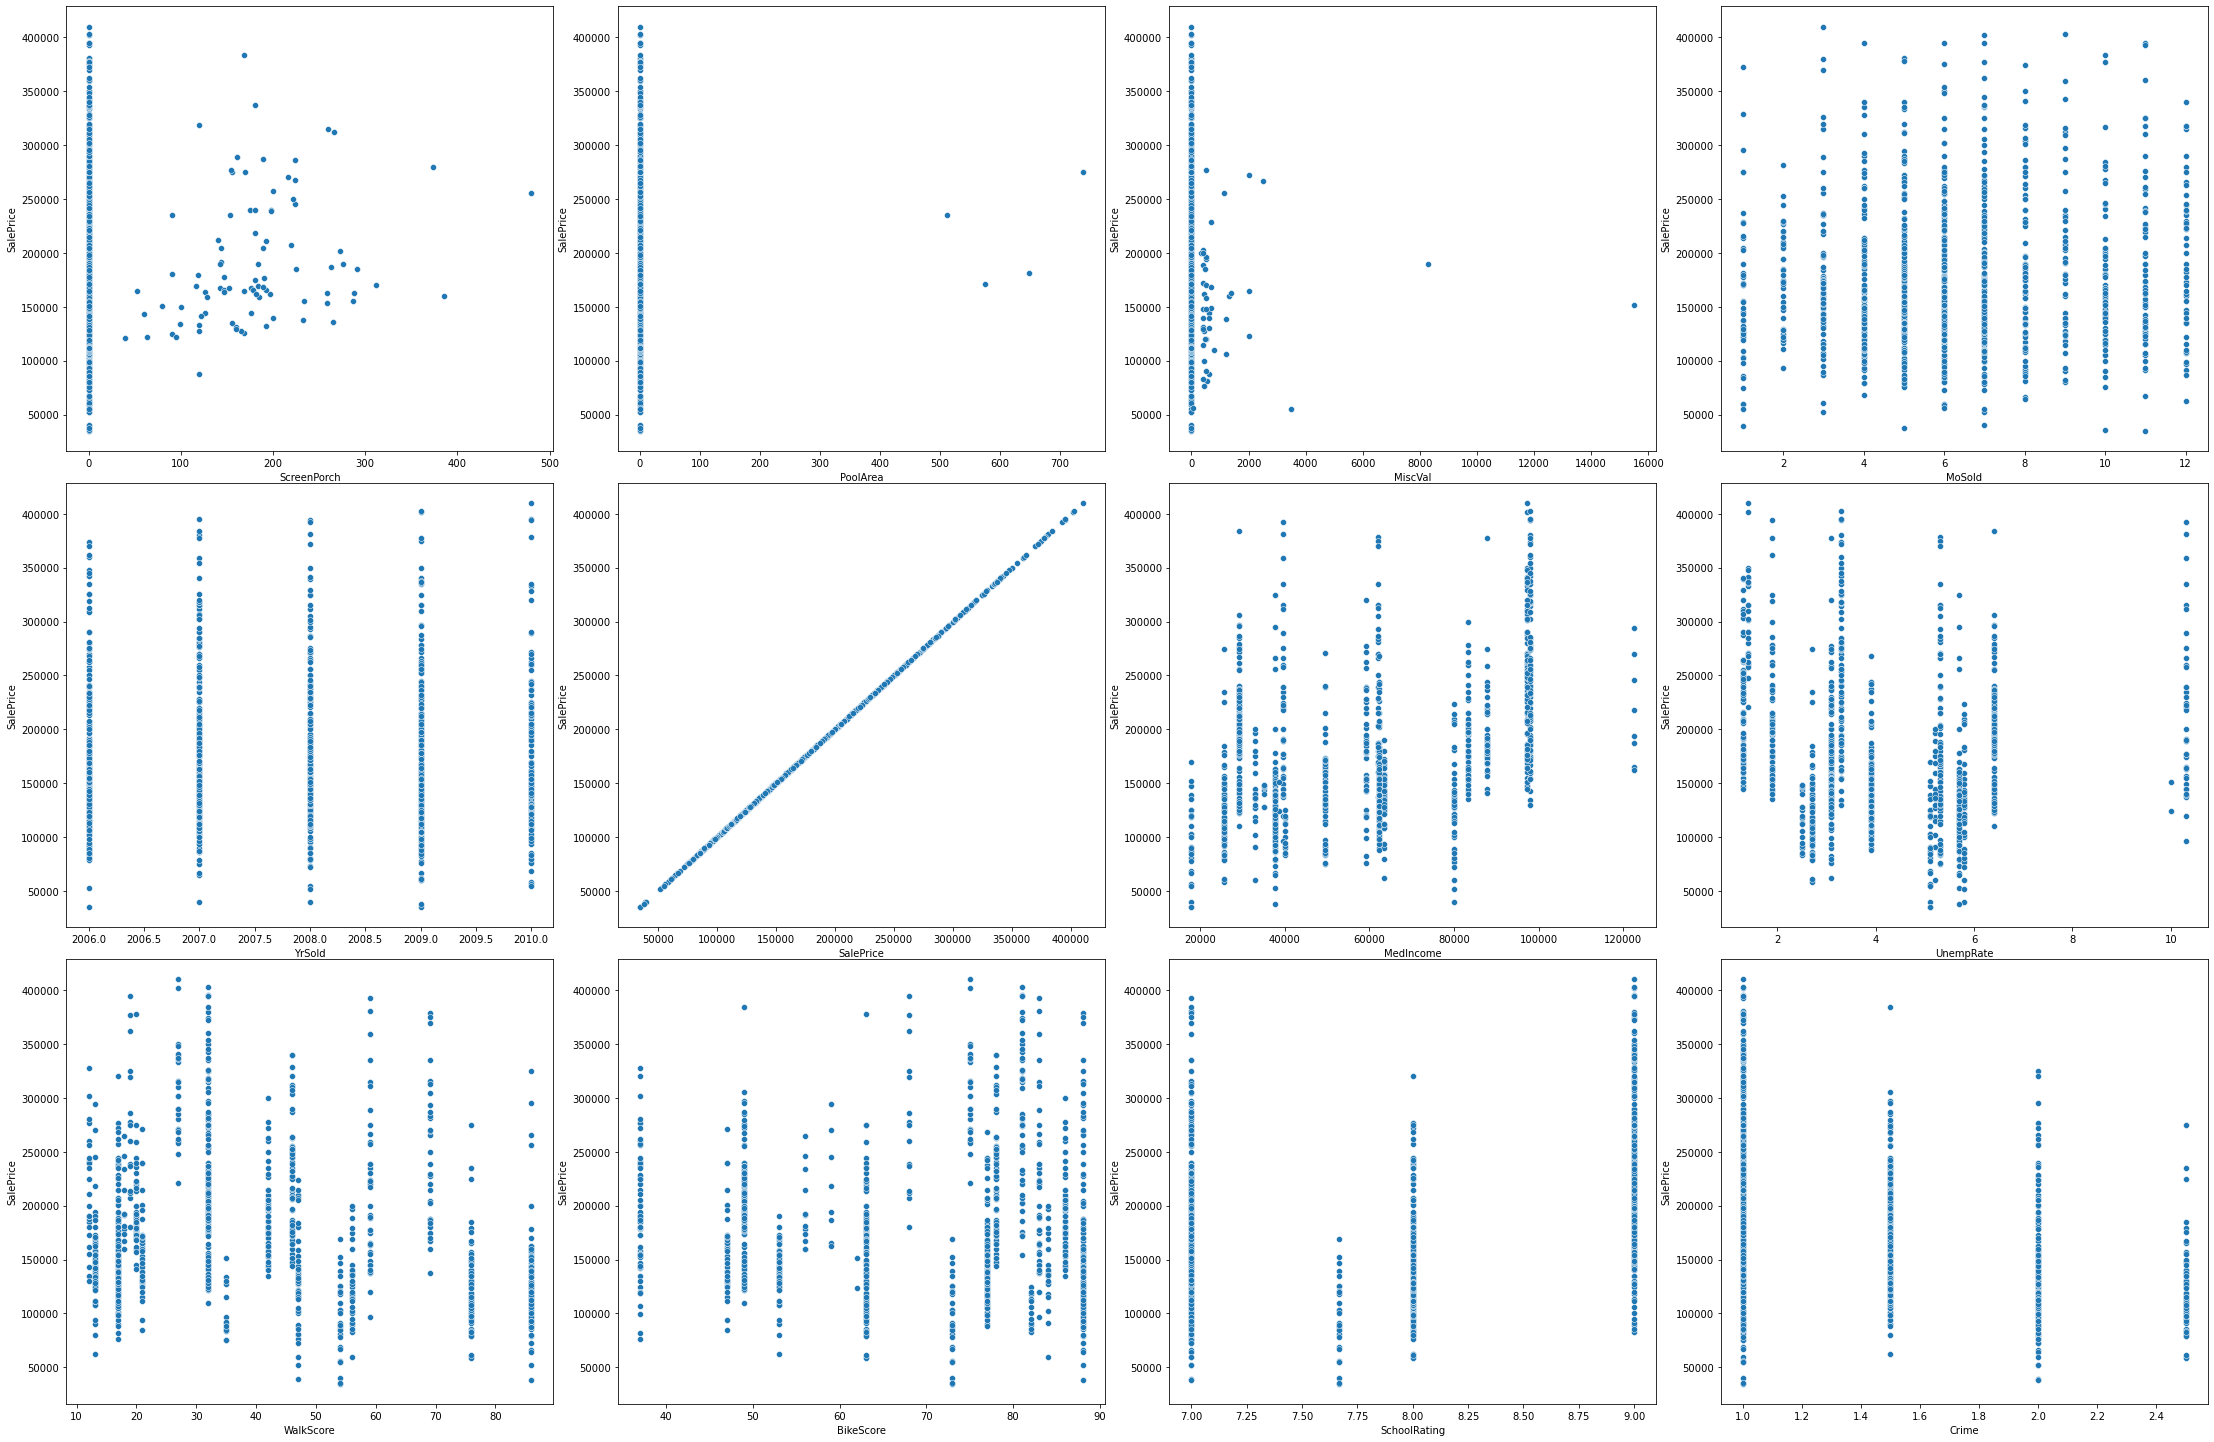

In [155]:
plot_vars = num_features[31:]
create_plot(plot_vars, 3, 4)

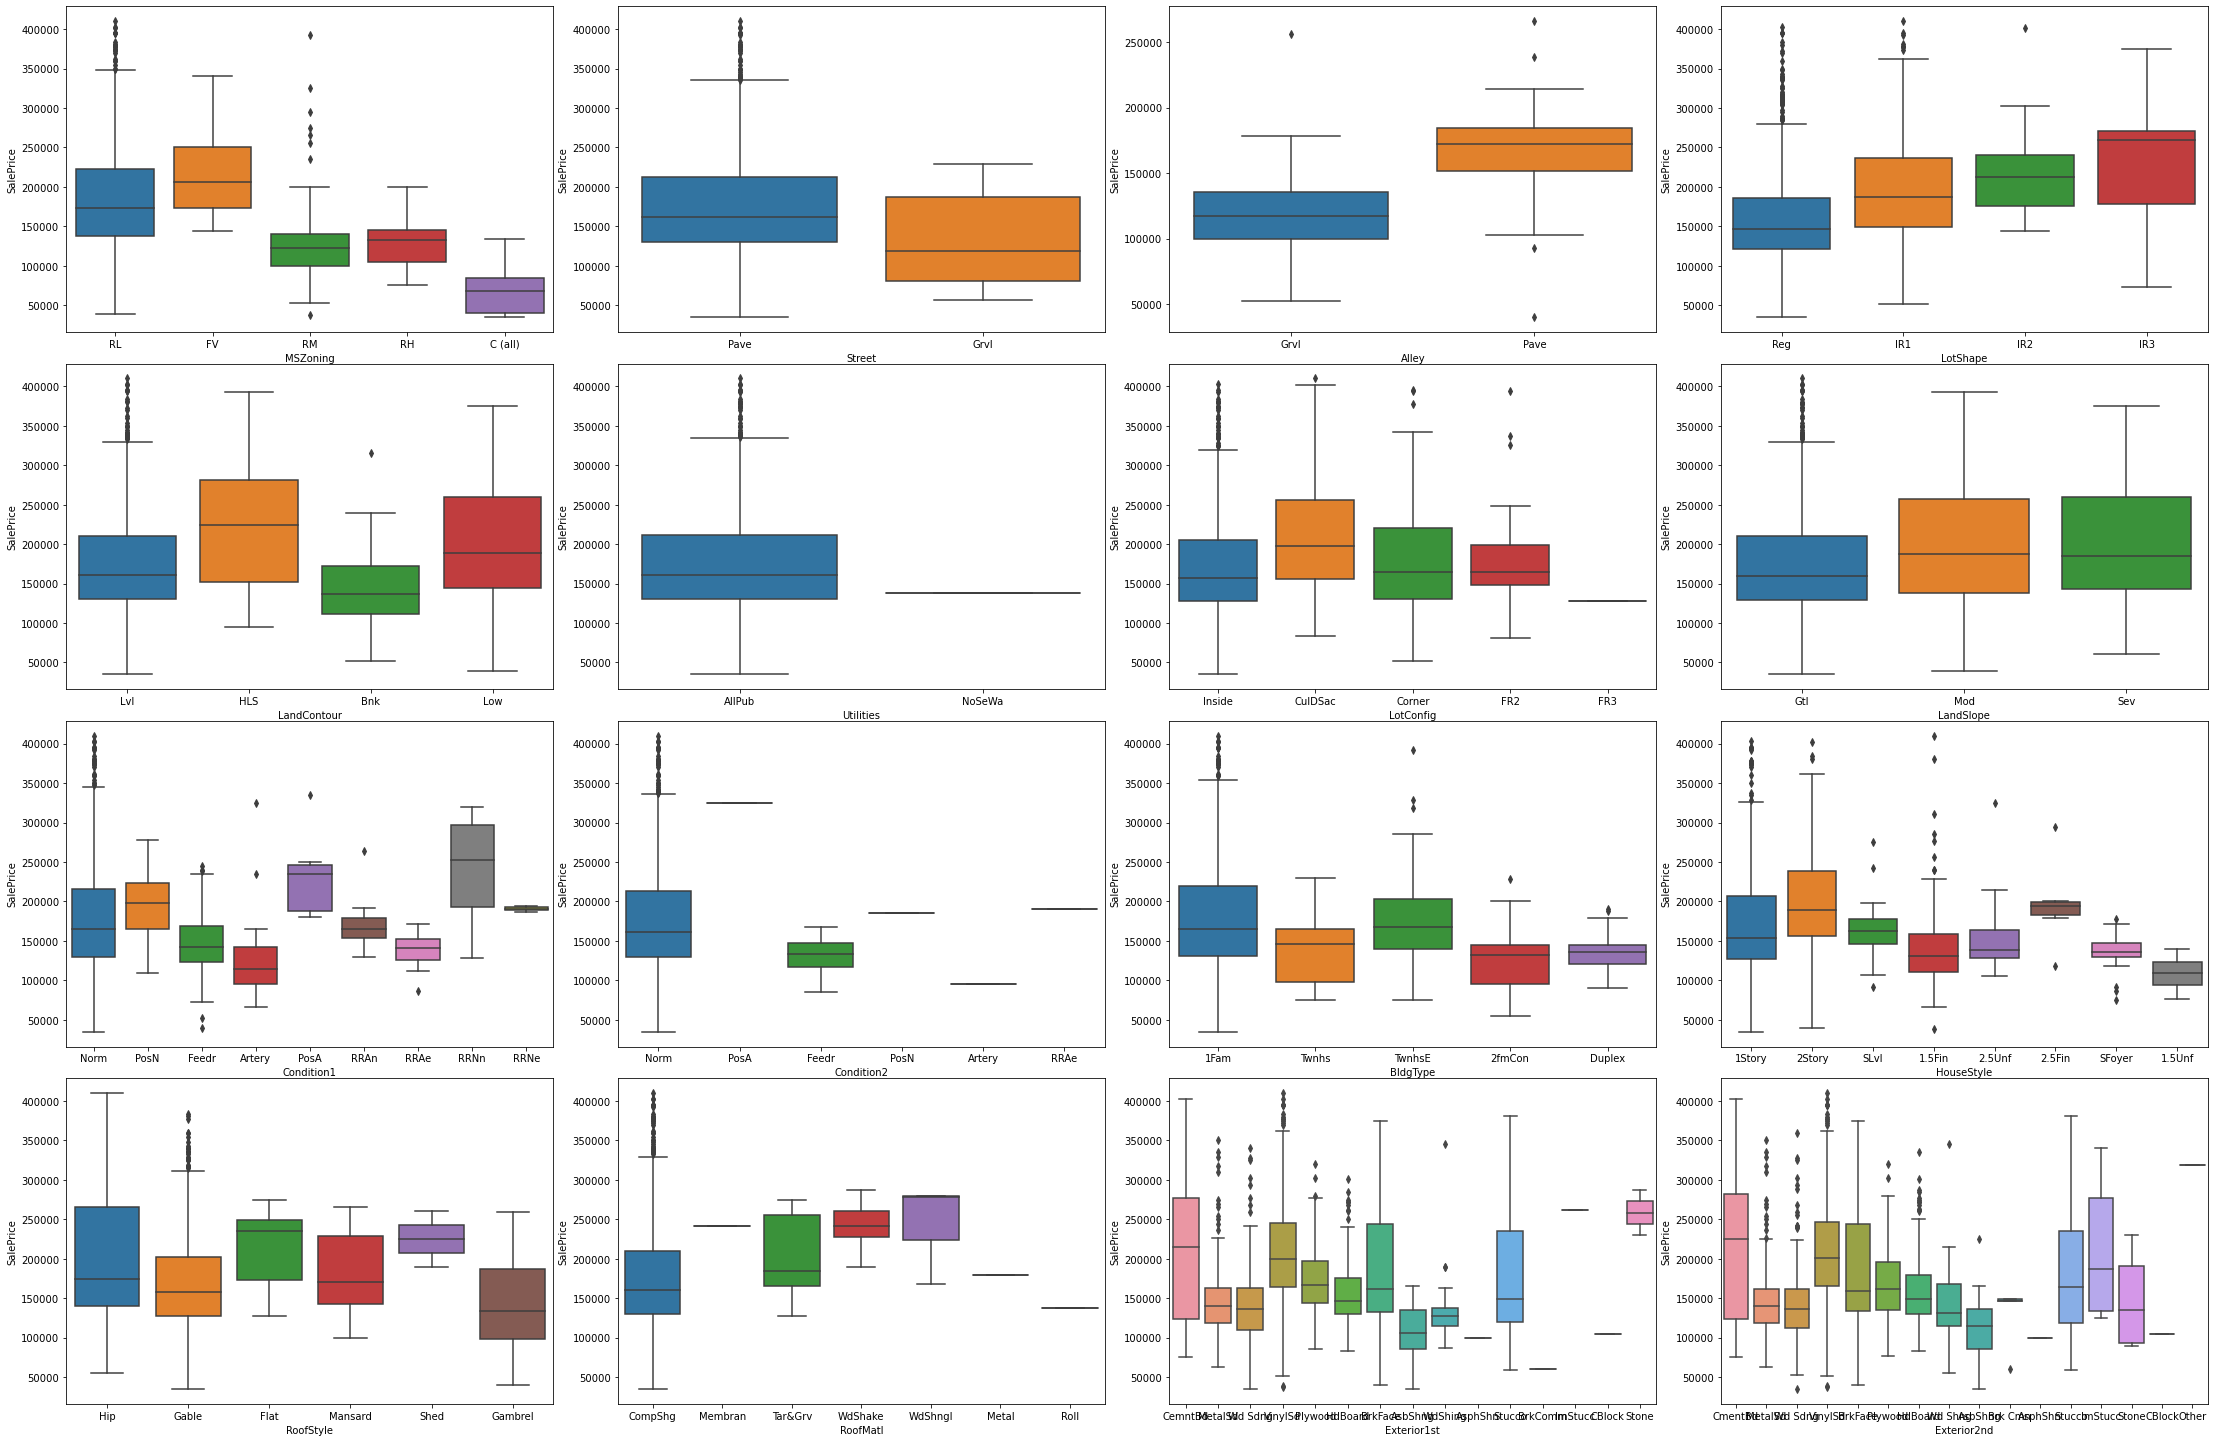

In [153]:
plot_vars = cate_features[:16]
create_plot(plot_vars, 4, 4, True)

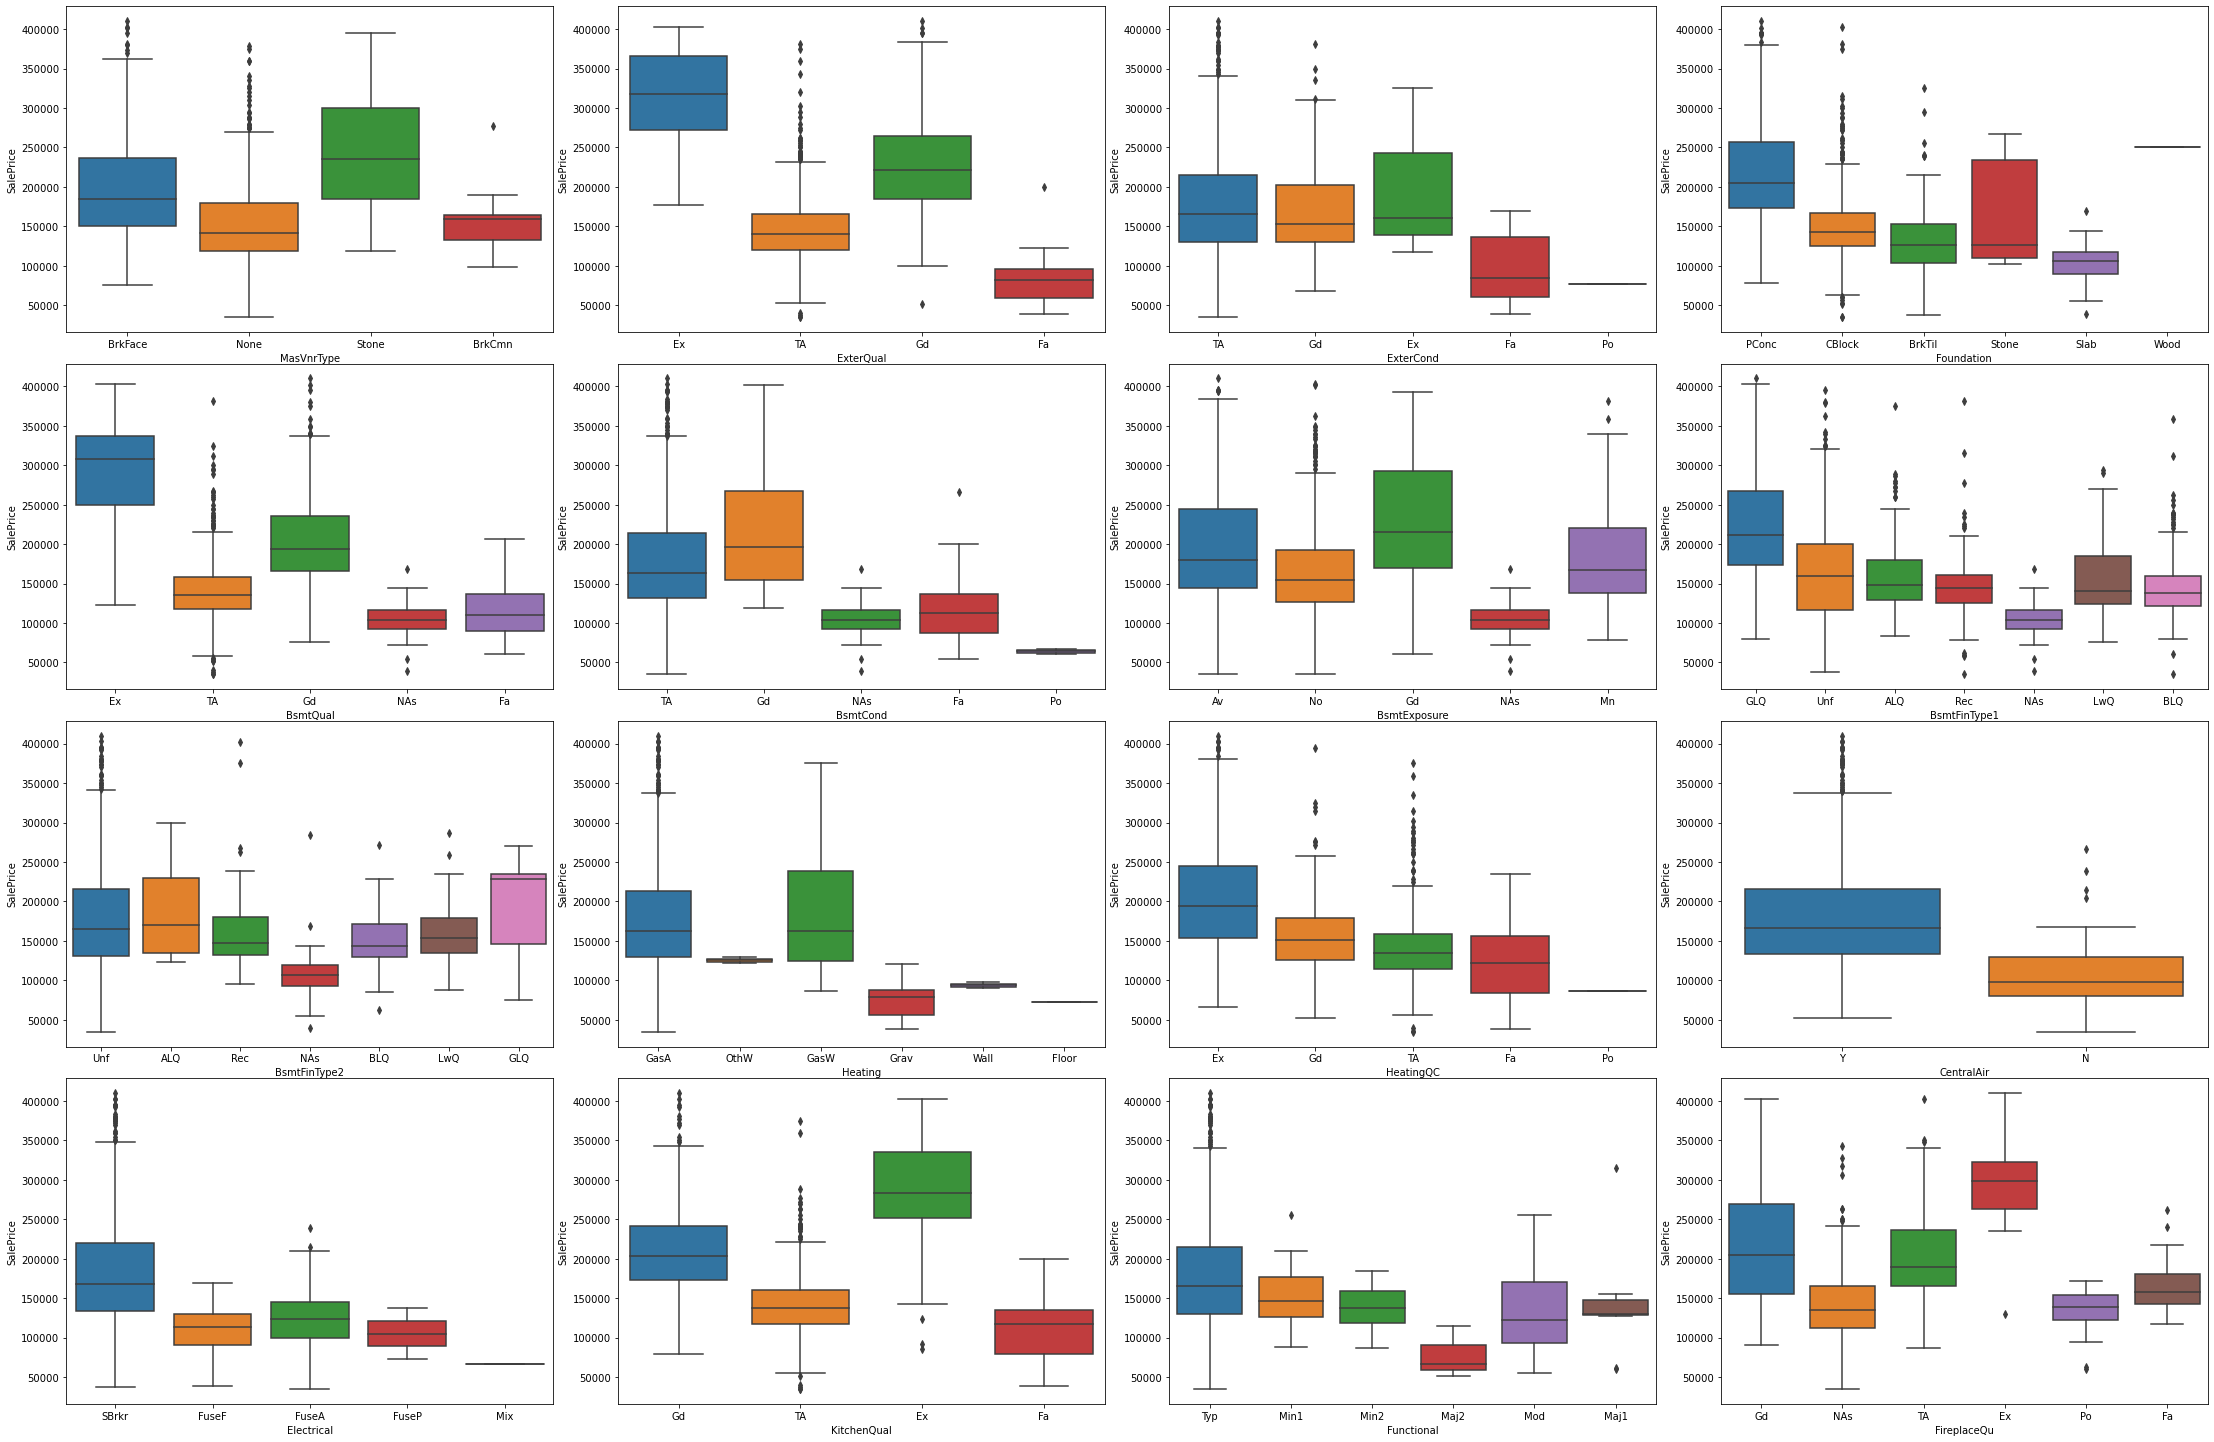

In [152]:
plot_vars = cate_features[16:32]
create_plot(plot_vars, 4, 4, True)

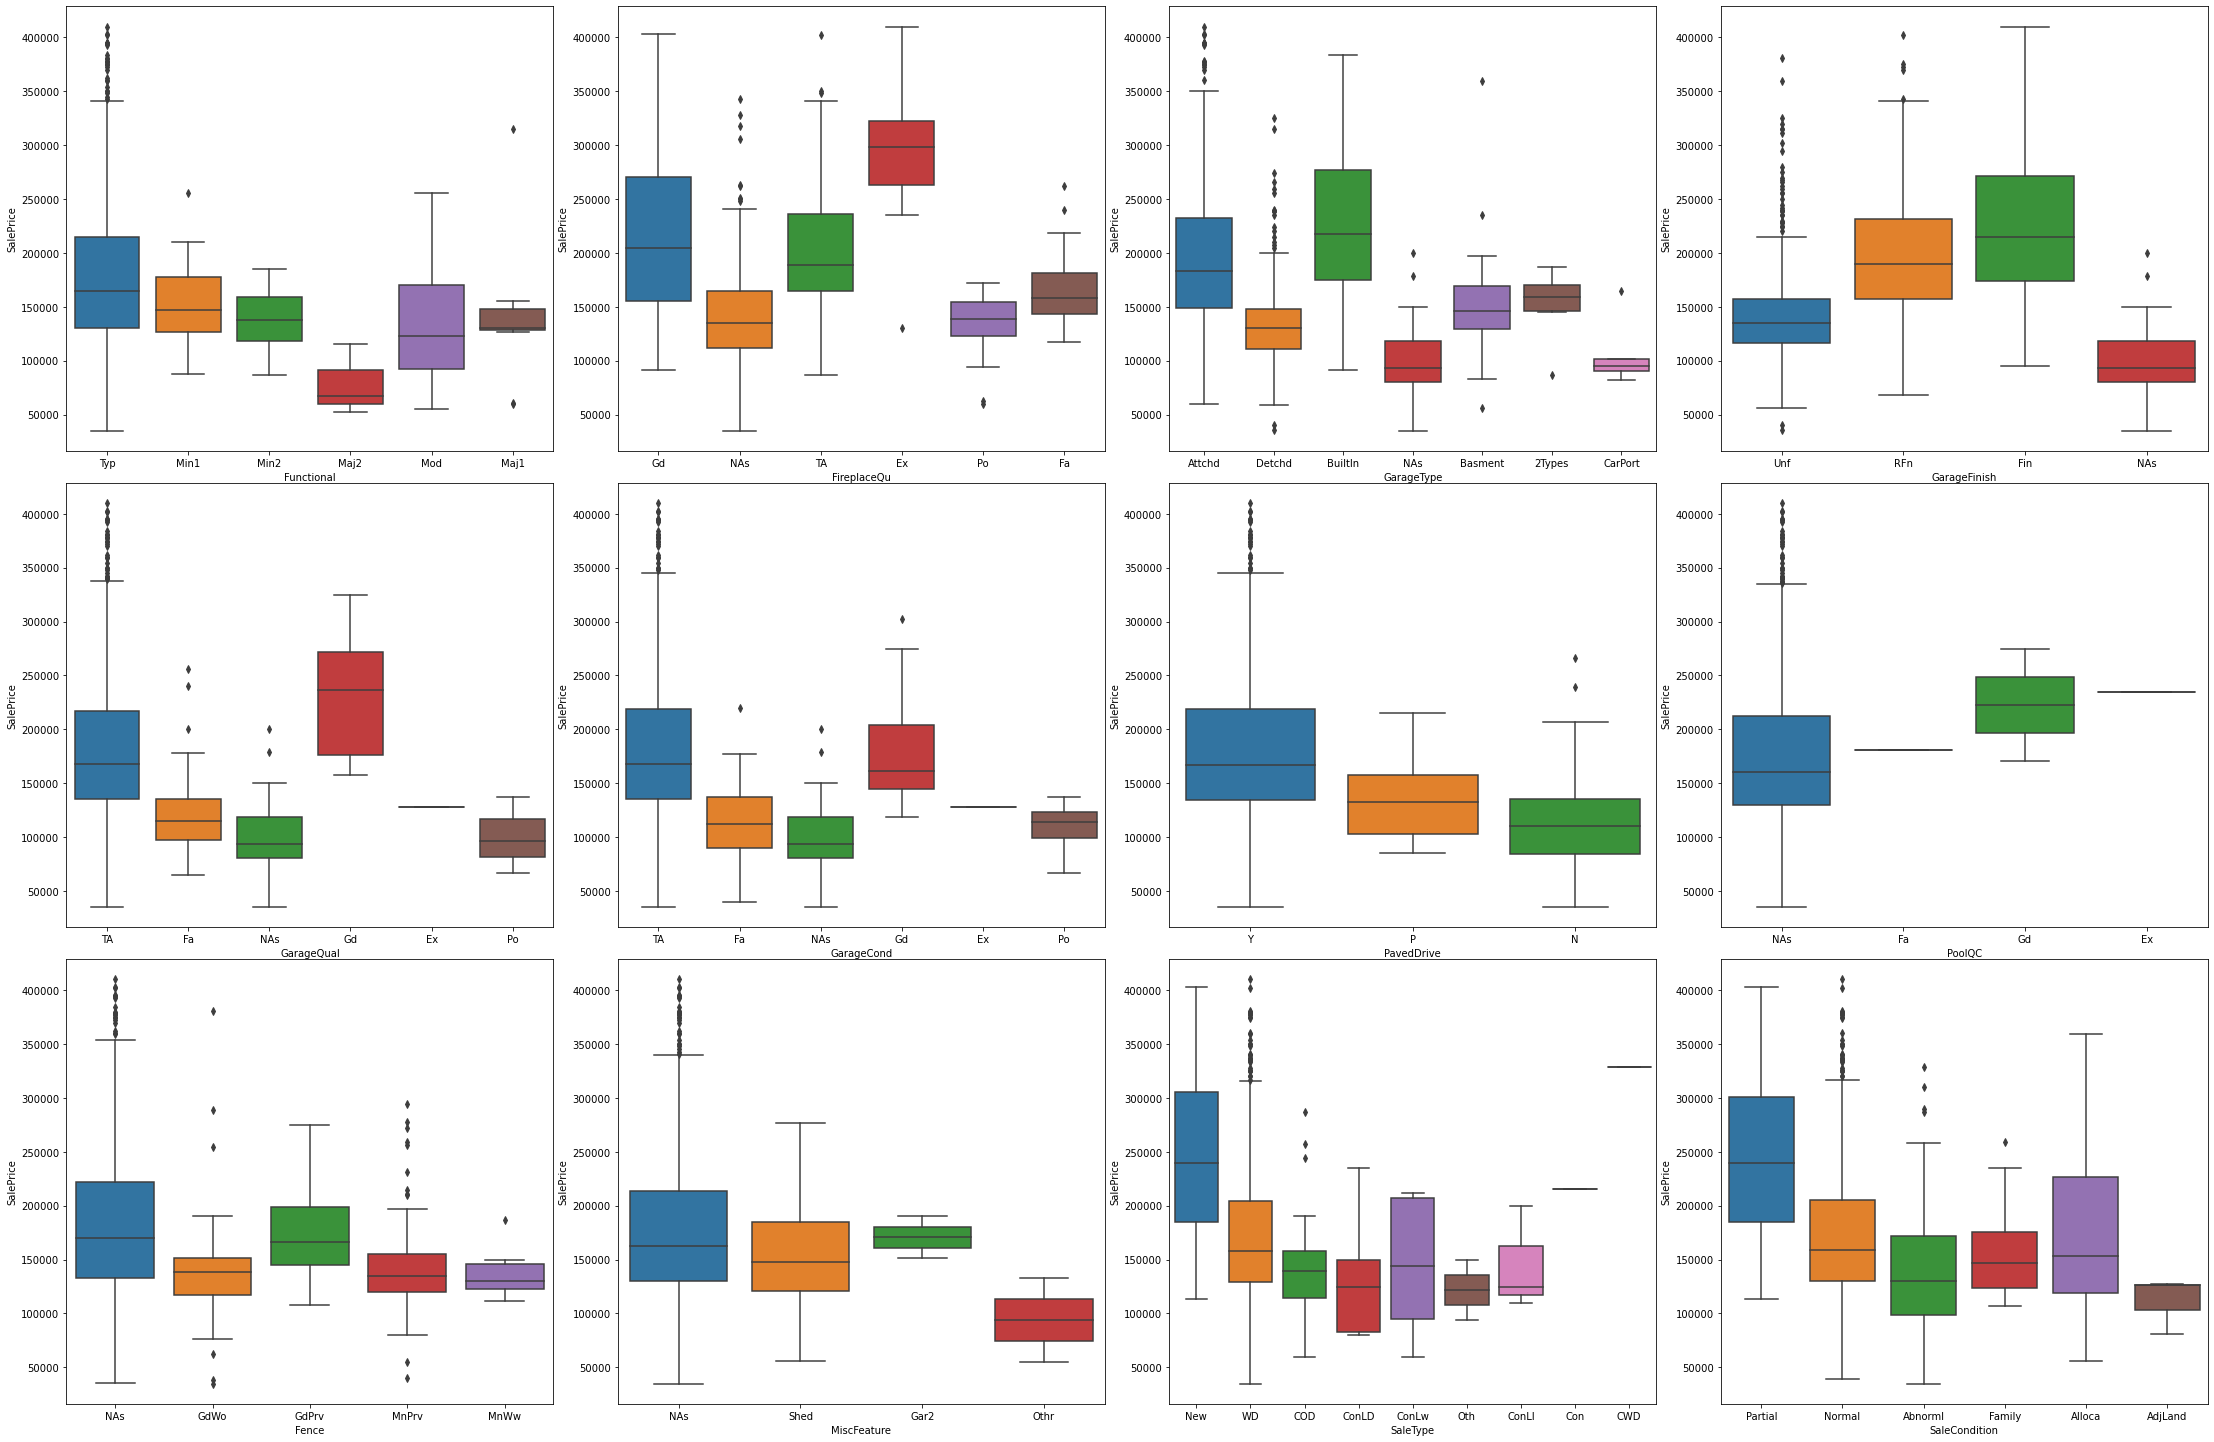

In [154]:
plot_vars = cate_features[30:]
create_plot(plot_vars, 3, 4, True)